# Приветствие

Добро пожаловать в этот проект! Здесь мы будем работать над интересной и важной задачей по предсказанию NPS.

# Описание задачи

**Задача:** Разработка прогнозной модели на Python для формирования краткосрочных и долгосрочных прогнозов показателя NPS.

**Подзадачи:**

1. **Анализ исторических данных:** Использование приложенных данных за анализируемый период для обучения модели.

2. **Учёт сезонности:** Изучение данных на предмет сезонных колебаний и включение этой информации в модель.

3. **Ручное влияние на прогноз:** Реализация функции в скрипте, которая позволяет пользователю вручную корректировать краткосрочный прогноз (например, если есть информация о том, что в ближайшем периоде NPS должен измениться).

4. **Обучение модели:** Настройка и обучение модели на основе исторических данных.

5. **Универсальность модели:** Модель должна быть способна работать с различными данными и давать релевантные прогнозы на основе новых входных данных.



**Ожидаемый результат:** Рабочий скрипт на Python, который может использоваться для формирования краткосрочных и долгосрочных прогнозов показателя NPS, с возможностью ручного влияния на прогноз и применения модели на других данных. Код должен быть хорошо документирован, чтобы пользователь мог легко понять, какие строки отвечают за определенные функции.

# Комментарии

В этом проекте вы увидите комментарии разных цветов:

- <div style="background-color:#87CEEB; color:black; padding: 10px;">Синие комментарии</div> используются для описания выводов, которые были сделаны на основе анализа данных.
- <div style="background-color:#d9d3cc; color:black; padding: 10px;">Серые комментарии</div> указывают на места, которые нужно будет изменить или доработать в процессе работы над проектом, если будут использоваться другие периоды.

Пожалуйста, обратите внимание на эти комментарии, поскольку они помогут вам лучше понять, как был выполнен анализ, и что еще предстоит сделать при использовании разных периодов.

1. **Анализ исторических данных.**

In [61]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import joblib

In [62]:
# Загрузка данных из файла Excel
df = pd.read_excel('data.xlsx')

# Преобразование данных из широкого формата в длинный формат
df_melt = df.melt(id_vars='Unnamed: 0', var_name='date', value_name='nps')

# Отбор только тех строк, где 'Unnamed: 0' равно 'NPS'
df_melt = df_melt[df_melt['Unnamed: 0'] == 'NPS']

# Удаление столбца 'Unnamed: 0'
df_melt = df_melt.drop(columns='Unnamed: 0')

# Получение списка значений NPS
nps_values = df_melt['nps'].tolist()

# Создание нового DataFrame с датами и значениями NPS
data = {
    'date': pd.date_range(start='2021-01', periods=len(nps_values), freq='ME'),  # создание диапазона дат с месячной частотой
    'nps': nps_values  # использование полученного списка значений NPS
}
df = pd.DataFrame(data)  # создание нового DataFrame
print(df)

         date       nps
0  2021-01-31  0.414059
1  2021-02-28  0.406382
2  2021-03-31  0.395849
3  2021-04-30  0.382914
4  2021-05-31  0.388393
5  2021-06-30  0.350716
6  2021-07-31  0.377037
7  2021-08-31  0.392621
8  2021-09-30  0.333502
9  2021-10-31  0.354134
10 2021-11-30  0.356116
11 2021-12-31  0.342949
12 2022-01-31  0.417011
13 2022-02-28  0.387498
14 2022-03-31  0.400713
15 2022-04-30  0.463081
16 2022-05-31  0.460483
17 2022-06-30  0.430188
18 2022-07-31  0.471609
19 2022-08-31  0.401158
20 2022-09-30  0.396337
21 2022-10-31  0.432743
22 2022-11-30  0.406484
23 2022-12-31  0.412071
24 2023-01-31  0.396626
25 2023-02-28  0.378553
26 2023-03-31  0.401235
27 2023-04-30  0.410072
28 2023-05-31  0.392946
29 2023-06-30  0.395965
30 2023-07-31  0.410557
31 2023-08-31  0.399611
32 2023-09-30  0.403432
33 2023-10-31  0.366731
34 2023-11-30  0.372536
35 2023-12-31  0.371072
36 2024-01-31  0.421504
37 2024-02-29  0.388842
38 2024-03-31  0.438066


<div style="background-color:#d9d3cc; color:black; padding: 10px;">
Функция pd.date_range(start='2021-01', periods=len(nps_values), freq='ME') генерирует диапазон дат, начиная с января 2021 года, с количеством дат, равным количеству элементов в nps_values, и каждая дата представляет конец месяца ('ME').
В функции `pd.date_range` параметр `freq` определяет частоту дат в диапазоне. Вот некоторые из возможных значений:

- `'D'`: Календарный день
- `'B'`: Рабочий день
- `'W'`: Неделя
- `'M'`: Конец месяца
- `'MS'`: Начало месяца
- `'Q'`: Конец квартала
- `'QS'`: Начало квартала
- `'A'`: Конец года
- `'AS'`: Начало года
- `'H'`: Час
- `'T'` или `'min'`: Минута
- `'S'`: Секунда

Вы можете также добавить числовой префикс для указания множественного количества, например `'5D'` для пяти дней. Более подробную информацию можно найти в [документации pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).
</div>

In [63]:
# Выводим описательную статистику для столбца 'nps' в DataFrame df
print(df['nps'].describe())

count    39.000000
mean      0.397995
std       0.030838
min       0.333502
25%       0.380733
50%       0.396626
75%       0.411314
max       0.471609
Name: nps, dtype: float64


In [64]:
# Преобразуем столбец 'date' в DataFrame df в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Удаляем информацию о часовом поясе из столбца 'date'
df['date'] = df['date'].dt.tz_localize(None)

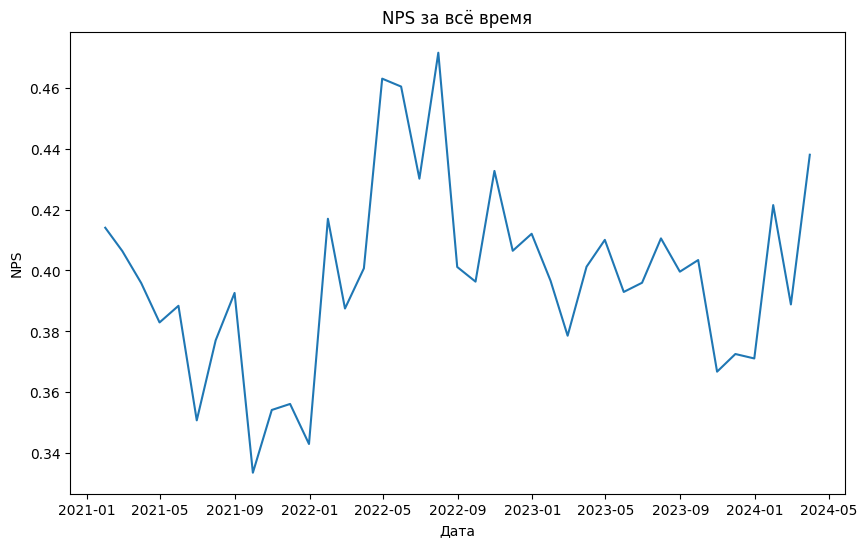

In [65]:
# Создаем новую фигуру для графика с размером 10x6
plt.figure(figsize=(10,6))

# Строим линейный график, где по оси X - даты, а по оси Y - значения NPS
plt.plot(df['date'], df['nps'])

# Устанавливаем название графика
plt.title('NPS за всё время')

# Устанавливаем название для оси X
plt.xlabel('Дата')

# Устанавливаем название для оси Y
plt.ylabel('NPS')

# Отображаем график
plt.show()

<div style="background-color:#87CEEB; color:black; padding: 10px;">
График показывает колебания NPS с января 2021 по март 2024. Заметно падение в сентябре 2021 и резкий рост к июлю 2022.
</div>

<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Вывод:</b><br>
В этом коде мы анализируем данные о NPS с января 2021 года по март 2024 года. NPS - это метрика, которая измеряет лояльность клиентов к компании.

- **Импорт библиотек**: Импортируются необходимые библиотеки для обработки данных, построения графиков и моделирования.

- **Загрузка данных**: Данные загружаются из файла Excel в DataFrame pandas.

- **Преобразование данных**: Данные преобразуются из широкого формата в длинный формат, отбираются только строки, где 'Unnamed: 0' равно 'NPS', и удаляется столбец 'Unnamed: 0'.

- **Создание нового DataFrame**: Создается новый DataFrame с датами и значениями NPS.

- **Описательная статистика**: Выводится описательная статистика для столбца 'nps' в DataFrame.

- **Преобразование даты**: Столбец 'date' преобразуется в формат datetime и удаляется информация о часовом поясе.

- **Построение графика**: Строится линейный график, где по оси X - даты, а по оси Y - значения NPS. График показывает колебания NPS с января 2021 года по март 2024 года. Заметно падение в сентябре 2021 года и резкий рост к июлю 2022 года.
</div>

2. **Учёт сезонности.**

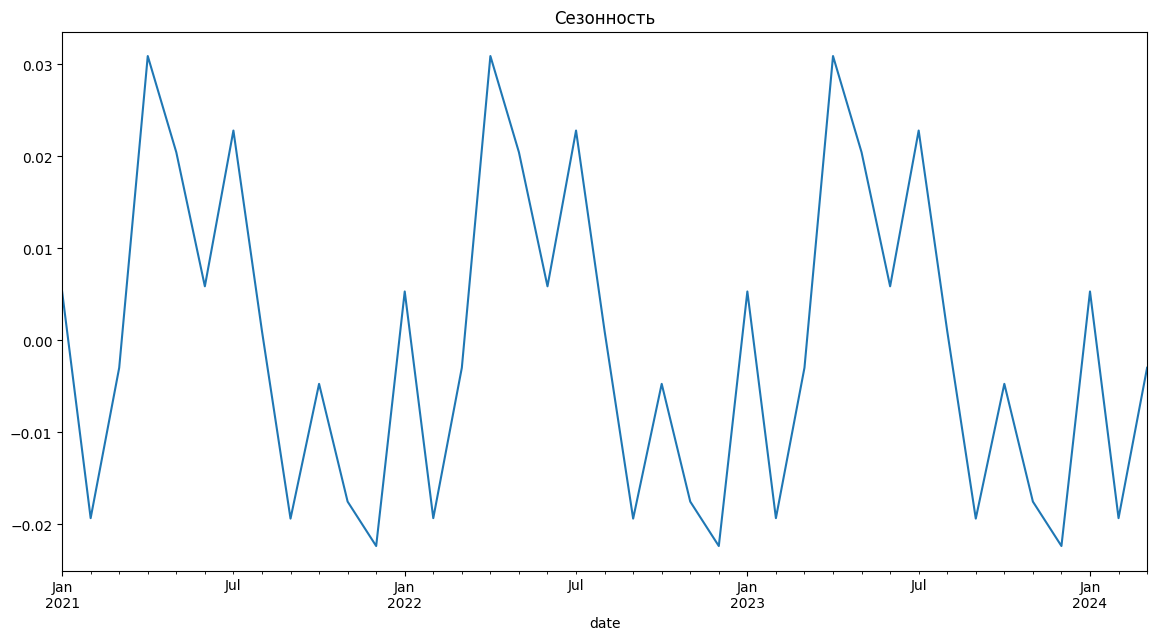

In [66]:
# Создаем копию DataFrame
df_copy = pd.DataFrame(data)

# Устанавливаем столбец 'date' в качестве индекса DataFrame
df_copy.set_index('date', inplace=True)

# Производим сезонное разложение данных NPS с периодом в 12 месяцев
decomposed = seasonal_decompose(df_copy['nps'], period=12)

# Извлекаем сезонную компоненту из разложения
seasonal = decomposed.seasonal

# Создаем новую фигуру для графика с размером 14x7
plt.figure(figsize=(14, 7))

# Строим график сезонной компоненты
seasonal.plot()

# Устанавливаем название графика
plt.title('Сезонность')

# Отображаем график
plt.show()

<div style="background-color:#d9d3cc; color:black; padding: 10px;">
В этом коде seasonal_decompose(df_copy['nps'], period=12) производит сезонное разложение данных NPS с периодом в 12 месяцев. Здесь period=12 указывает на годовую сезонность (12 месяцев в году).

Если у вас другая периодичность, то это нужно учесть в параметре period. Например, если данные имеют сезонность каждые 31 день, то вы должны установить period=31. Это позволит корректно выделить сезонную компоненту в данных.
</div>

<div style="background-color:#87CEEB; color:black; padding: 10px;">

- В февраля NPS на 2% ниже среднего уровня.
- В апреле NPS на 3% выше среднего уровня.
- В мае NPS на 2% выше среднего уровня.
- В июле NPS на 2% выше среднего уровня.
- В сентябре NPS на 2% ниже среднего уровня.
- В ноябре NPS на 2% ниже среднего уровня.
- В декабре NPS на 2% ниже среднего уровня.
</div>

In [67]:
# Добавляем сезонную компоненту в DataFrame df_copy как новый столбец 'seasonality'
df_copy['seasonality'] = decomposed.seasonal

# Преобразуем значения сезонности в список
seasonality_values = df_copy['seasonality'].tolist()

# Добавляем значения сезонности в исходный DataFrame df как новый столбец 'seasonality'
df['seasonality'] = seasonality_values

<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Вывод:</b><br>
В этом коде мы анализируем данные о NPS и исследуем их сезонность.

- **Сезонное разложение**: Производится сезонное разложение данных NPS с периодом в 12 месяцев. Это позволяет выделить сезонную компоненту в данных.
- **Построение графика сезонности**: Строится график сезонной компоненты, который показывает изменение NPS в течение года. График показал, что NPS имеет определенную сезонность в течение года. Например, в феврале, сентябре, ноябре и декабре NPS на 2% ниже среднего уровня, в то время как в апреле, мае и июле NPS на 2-3% выше среднего уровня.
- **Добавление сезонности в DataFrame**: Сезонная компонента добавляется в исходный DataFrame как новый столбец 'seasonality'.

</div>

3. **Ручное влияние на прогноз.**

In [68]:
# Добавляем новый столбец 'adjustment' в DataFrame df и заполняем его нулями
df['adjustment'] = 0.0

<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Вывод:</b><br>
В этом коде мы добавили новый столбец 'adjustment' в DataFrame `df` и заполнили его нулями:

```python
df['adjustment'] = 0.0
```

Этот столбец 'adjustment' будет использоваться для обучения модели. Он может быть полезен, если мы хотим внести корректировки в прогноз на краткосрочный период (например, на следующий месяц). Если мы хотим повлиять на прогноз, мы должны указать соответствующее значение в этом столбце, когда будем делать прогноз на уже обученной модели. Это позволит модели учесть эти корректировки при прогнозировании. Сейчас пока ничего изменять не надо, при обучении модели так и оставляем df['adjustment'] = 0.0.

Таким образом, столбец 'adjustment' играет важную роль в настройке и улучшении точности наших прогнозов.

</div>

4. **Обучение модели.**

In [69]:
# Определение функции make_features для создания новых признаков в DataFrame
def make_features(df, max_lag, rolling_mean_size):
    # Добавляем столбец 'year', извлекая год из столбца 'date'
    df['year'] = df['date'].dt.year
    
    # Добавляем столбец 'month', извлекая месяц из столбца 'date'
    df['month'] = df['date'].dt.month
    
    # Для каждого значения от 1 до max_lag (включительно)
    for lag in range(1, max_lag + 1):
        # Создаем новый столбец с именем 'lag_i', где i - это текущее значение lag
        # Значения столбца - это значения столбца 'nps', сдвинутые на i позиций вниз
        df['lag_{}'.format(lag)] = df['nps'].shift(lag)
        
    # Создаем новый столбец 'rolling_mean'
    # Значения столбца - это скользящее среднее значение столбца 'nps' с окном размера rolling_mean_size
    # Значения 'nps' сдвигаются на одну позицию вниз перед вычислением скользящего среднего
    df['rolling_mean'] = df['nps'].shift().rolling(window=rolling_mean_size).mean()

# Вызов функции make_features для DataFrame df с max_lag=7 и rolling_mean_size=6
make_features(df, 7, 6)

In [70]:
# Разделяем исходный DataFrame на обучающую и тестовую выборки, при этом не перемешивая данные (shuffle=False)
# Размер тестовой выборки составляет 20% от исходных данных (test_size=0.2)
train, test = train_test_split(df, shuffle=False, test_size=0.2)

# Удаляем строки с пропущенными значениями в обучающей выборке
train = train.dropna()

# Создаем обучающую выборку признаков, удаляя столбец 'nps'
X_train = train.drop('nps', axis=1)

# Создаем обучающую выборку целевого признака (столбец 'nps')
y_train = train['nps']

# Создаем тестовую выборку признаков, удаляя столбец 'nps'
X_test = test.drop('nps', axis=1)

# Создаем тестовую выборку целевого признака (столбец 'nps')
y_test = test['nps']

# Добавляем в обучающую выборку признаков два новых столбца: 'year' и 'month', извлекая эти значения из столбца 'date'
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month

# Удаляем столбец 'date' из обучающей и тестовой выборок признаков, так как мы уже извлекли из него всю нужную информацию
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

In [75]:
# Создаем список моделей для обучения и прогнозирования
models = [
    ("Linear Regression", LinearRegression()),  # Линейная регрессия
    ("Random Forest", RandomForestRegressor()),  # Случайный лес
    ("Support Vector Regressor", SVR()),  # Метод опорных векторов
    ("CatBoost", CatBoostRegressor(logging_level='Silent'))  # CatBoost
]

# Для каждой модели в списке
for name, model in models:
    # Обучаем модель на обучающей выборке
    model.fit(X_train, y_train)
    
    # Прогнозируем значения на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Вычисляем абсолютные ошибки прогноза
    errors = abs((y_test - y_pred) / y_test)
    
    # Вычисляем среднюю абсолютную процентную ошибку (MAPE)
    mape = errors.mean() * 100
    
    # Выводим точность прогноза для каждой модели на тестовых данных
    print(f"Точность прогноза {name} на тестовых данных: {round(100 - mape,2)}%")

Точность прогноза Linear Regression на тестовых данных: 95.46%
Точность прогноза Random Forest на тестовых данных: 94.98%
Точность прогноза Support Vector Regressor на тестовых данных: 94.58%
Точность прогноза CatBoost на тестовых данных: 95.13%


In [72]:
# Создаем экземпляр модели линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

# Сохранение модели в файл
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Вывод:</b><br>
В этом коде мы выполнили следующие шаги:

- **Создание новых признаков**: Мы определили функцию `make_features`, которая создает новые признаки в DataFrame. Эти признаки включают год и месяц каждой даты, а также значения 'nps', сдвинутые на определенное количество позиций вниз (лаги), и скользящее среднее значение 'nps'. Значения лагов и скользящего среднего могут помочь учесть временные зависимости в данных. Параметры 7 для max_lag и 6 для rolling_mean_size тоже подобраны опытным путём, т.к эти значения показывают наибольшую точность и эту часть кода я удалил, чтобы не загромождать проект.

- **Разделение данных на обучающую и тестовую выборки**: Мы разделили исходные данные на обучающую и тестовую выборки, затем удалили пропущенные значения и создали выборки признаков и целевого признака.

- **Обучение моделей**: Мы обучили четыре различные модели машинного обучения (линейную регрессию, случайный лес, метод опорных векторов и CatBoost) на обучающей выборке.

- **Прогнозирование и оценка моделей**: Мы прогнозировали значения на тестовой выборке и вычислили среднюю абсолютную процентную ошибку (MAPE) для каждой модели. Затем мы вывели точность прогноза для каждой модели на тестовых данных. Была выбрана лучшая модель по показателю точности - Linear Regression: 95.46%.

- **Сохранение модели**: Мы обучили модель линейной регрессии и сохранили ее в файл linear_regression_model.pkl для последующего использования.

</div>

5. **Универсальность модели**

<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Вывод:</b><br>
Модель обучается на различных данных и способна давать релевантные прогнозы на основе новых входных данных. Универсальность модели обеспечивается с помощью следующих комментариев:

- **Обучение модели**
В этом разделе кода (указано серым) вы найдете места, которые необходимо изменить при обучении модели в файле model_training.ipynb. Пожалуйста, обратите внимание на эти комментарии и внесите соответствующие изменения в код.

- **Предсказание с помощью обученной модели**
После обучения модели вы можете использовать ее для предсказания на новых данных. В этом разделе кода вы найдете комментарии, в которых указаны места, которые необходимо изменить для использования обученной модели в nps_prediction.py. Пожалуйста, обратите внимание на эти комментарии и внесите соответствующие изменения в код.


</div>



<div style="background-color:#87CEEB; color:black; padding: 10px;">
<b>Общий вывод:</b><br>

## Анализ данных и моделирование NPS

В представленном коде был проведен анализ данных о NPS (Net Promoter Score) с января 2021 года по март 2024 года. NPS является важной метрикой, отражающей уровень лояльности клиентов к компании.

### Шаги анализа данных:

1. **Импорт библиотек:** Импортировали необходимые библиотеки для обработки данных, построения графиков и моделирования.
2. **Загрузка данных:** Данные были загружены из файла Excel в DataFrame pandas.
3. **Преобразование данных:** Данные были преобразованы в длинный формат, удалены лишние столбцы.
4. **Создание нового DataFrame:** Был создан новый DataFrame с датами и значениями NPS.
5. **Описательная статистика:** Была проведена описательная статистика для столбца 'nps'.
6. **Преобразование даты:** Столбец 'date' был преобразован в формат datetime.
7. **Построение графика:** Построен линейный график, отображающий изменения NPS с января 2021 года по март 2024 года.

### Анализ сезонности:

1. **Сезонное разложение:** Было произведено сезонное разложение данных NPS с периодом в 12 месяцев.
2. **Построение графика сезонности:** Был построен график сезонной компоненты, выявляющий сезонные колебания NPS в течение года.

### Обучение моделей и прогнозирование:

1. **Создание новых признаков:** Была создана функция для создания новых признаков в DataFrame, включая лаги и скользящее среднее.
2. **Разделение данных:** Данные были разделены на обучающую и тестовую выборки.
3. **Обучение моделей:** Были обучены четыре различные модели машинного обучения.
4. **Прогнозирование и оценка моделей:** Были выполнены прогнозы на тестовой выборке, оценена точность моделей, лучшей оказалась модель линейной регрессии с точностью 95.46%.
5. **Сохранение модели:** Обученная модель линейной регрессии была сохранена в файл.

## Важность моделирования NPS

Моделирование NPS имеет большое значение для компаний, поскольку помогает понять уровень лояльности клиентов и выявить тенденции в их отношениях с брендом. Полученные прогнозы могут быть использованы для принятия решений по улучшению сервиса и увеличению лояльности клиентов.




</div>

